<a href="https://colab.research.google.com/github/Manish-k723/ML-models/blob/main/Multiregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MULTIREGRESSION
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/CarPrice_Assignment.csv')
df.head()

In [ ]:
df.info()

In [7]:
print(df.shape)
print(df.size)

(205, 26)
5330


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


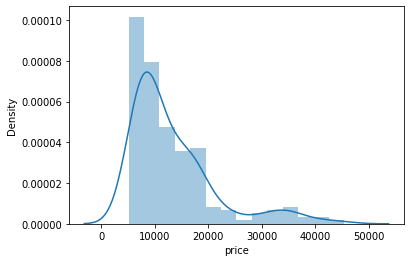

In [74]:
#Visualization
import seaborn as sns
sns.distplot(df.price)

In [20]:
#While making ML model, We want to only consider numeric data
#So, we will create new dataframe with only numeric data
df_numeric= df.select_dtypes(include=['Float64','int64'])
df_numeric.head(1)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0


In [9]:
df_numeric.shape

(205, 16)

In [21]:
#Removing car id and symboling column
df_numeric=df_numeric.drop(['symboling','car_ID'],axis=1)#axis=1 represents a column
df_numeric.head(1)


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0


In [59]:
df_numeric.info()
# Step-4
# # df_numeric=df_numeric.drop(['2'],axis=None)#axis=1 represents a column and axis=0 represents a row
# # df_numeric.head()
# #Divide the data into input and output
# output= price
# input= all columns except price


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
 13  price             205 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 22.5 KB


In [81]:
#Slicing for input
x= df_numeric.iloc[:,0:13].values
# .values will convert series into array
x

array([[  88.6,  168.8,   64.1, ..., 5000. ,   21. ,   27. ],
       [  88.6,  168.8,   64.1, ..., 5000. ,   21. ,   27. ],
       [  94.5,  171.2,   65.5, ..., 5000. ,   19. ,   26. ],
       ...,
       [ 109.1,  188.8,   68.9, ..., 5500. ,   18. ,   23. ],
       [ 109.1,  188.8,   68.9, ..., 4800. ,   26. ,   27. ],
       [ 109.1,  188.8,   68.9, ..., 5400. ,   19. ,   25. ]])

In [82]:
y=df_numeric.iloc[:,13:]
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [83]:
# STEP-5 - TRAIN AND TEST VARIABLES
# sklearn,model_selection is a package and train_test_split is library in it
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =0)#whatever data allocation/splitting happens to variable in first run,
                      # we want to keep that as it is so for that purpose we have used random_state =0

In [84]:
print(x.shape,y.shape)# BY default from whole data 75% of data goes for x_train(for training purpose) and remaining 25% goes for x_test(testing purpose)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(205, 13) (205, 1)
(153, 13) (153, 1)
(52, 13) (52, 1)


In [85]:
# STEP-6 Scaling or Normalisation and scaling is done only for inputs
#Scaling improves accuracy
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [49]:
#STEP 7. RUN A CLASSIFIER, REGRESSOR, CLUSTERER
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [51]:
# Step 8
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Step 9 -Predict the ouput
y_pred = model.predict(x_test)#By taking the input testing data, we predict the output
y_pred#predicted values

In [ ]:
y_test

In [56]:
print(x_train[10])#these are scaled or can say normalised values

[0.28862974 0.48503937 0.07070707 0.525      0.280068   0.15625
 0.41964286 0.61437908 0.125      0.16190476 0.67346939 0.38888889
 0.44736842]


In [78]:
l=model.predict([x[10]])

In [68]:
model.predict([[5,13,45,23,64,58,78,45,34,23,545,65,675]])

array([[12163662.86615738]])

In [80]:
# #Now we can crosscheck it via y=mx+c for completion of step-10
# so for MULTIREGRESSION
# we have to use formula as
# y= m1x1+m2x2+m3x3.......Mnxn + C1C2C3......Cn